<a href="https://colab.research.google.com/github/AsadullahGalib007/QOSF-Screening-Task/blob/main/Task_1_Statevector_simulation_of_quantum_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Statevector simulation of quantum circuits

TOC

>[Task 1 Statevector simulation of quantum circuits](#scrollTo=sVpXgAo3KFS-)

>>[Naive Simulation with simple matrix multiplicaion](#scrollTo=4yhbnH2l8qNU)

>>[Advanced Simulation with tensor multiplication](#scrollTo=FKDmCsU3KRbt)

>>[Bonus Question](#scrollTo=ETkPYpmUJ6Ds)



## 1. Naive Simulation with simple matrix multiplicaion

In [ ]:
# Initializing the statevec
import numpy as np
import time
import matplotlib.pyplot as plt

def initialize_statevector(n):
    statevector = np.zeros(2**n)
    statevector[0] = 1
    return statevector

# Example for a 1-12-qubit system
for i in range (1, 12):
    n_qubits = i
    statevector = initialize_statevector(n_qubits)
    print(f"n_qubit: {n_qubits}, State:|{'0' * n_qubits}>, Statevector:\n{statevector}")
    print()


n_qubit: 1, State:|0>, Statevector:
[1. 0.]

n_qubit: 2, State:|00>, Statevector:
[1. 0. 0. 0.]

n_qubit: 3, State:|000>, Statevector:
[1. 0. 0. 0. 0. 0. 0. 0.]

n_qubit: 4, State:|0000>, Statevector:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

n_qubit: 5, State:|00000>, Statevector:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

n_qubit: 6, State:|000000>, Statevector:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

n_qubit: 7, State:|0000000>, Statevector:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# basic gates
def hadamard():
    return np.array([
                    [1, 1],
                    [1, -1]]) / 2**0.5

def pauli_x():
    return np.array([
                    [0, 1],
                    [1, 0]])

def identity():
    return np.array([
                    [1, 0],
                    [0, 1]])

In [ ]:
def kron_product(gates):
    result = gates[0]
    for gate in gates[1:]:
        result = np.kron(result, gate)
    return result

def apply_gate(statevector, gate, qubit_index, num_qubits):
    gate_list = []
    for i in range(num_qubits):
        if i == qubit_index:
            gate_list.append(gate)  # Apply gate on the specific qubit
        else:
            gate_list.append(identity())  # Identity on other qubits
    full_operator = kron_product(gate_list)

    # Apply the full operator to the statevector
    return full_operator @ statevector

In [ ]:
# Define a quantum circuit and apply gates(X and Hadamard) sequentially
def quantum_circuit(num_qubits):
    state = initialize_statevector(num_qubits)

    print(f"Statevector(before)\n",state)
    print()

    for i in range(num_qubits):
        # Apply X gate to all
        state = apply_gate(state, pauli_x(), qubit_index=i, num_qubits=num_qubits)

        # Apply Hadamard gate to all
        state = apply_gate(state, hadamard(), qubit_index=i, num_qubits=num_qubits)

        # Couldn't
    print(f"Statevector(after)\n",state)
    print()
    return state

In [ ]:
def measure_runtime(n_qubits):
    qubit_range = range(1, n_qubits)  # Test for 1 to n_qubits
    runtimes = []

    for num_qubits in qubit_range:
        start_time = time.time()

        # Simulate the quantum circuit for num_qubits
        quantum_circuit(num_qubits)

        end_time = time.time()
        runtime = end_time - start_time
        runtimes.append(runtime)

        print(f"Number of qubits: {num_qubits}, Runtime: {runtime:.6f} seconds")
        print()

    return runtimes

In [ ]:
# Plot the runtime vs. number of qubits
def plot_runtime(qubit_range, runtimes):
    plt.figure(figsize=(10, 6))
    plt.plot(qubit_range, runtimes, marker='o', color='b')
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime of Quantum Circuit Simulation (Naive) vs. Number of Qubits')
    plt.grid(True)
    plt.show()

# Run the runtime measurement for naive simulation

# 14 qubits: 1 to 14
n_qubits = 14
qubit_range = range(1, n_qubits+1)
runtimes = measure_runtime(n_qubits+1)

Statevector(before)
 [1. 0.]

Statevector(after)
 [ 0.70710678 -0.70710678]

Number of qubits: 1, Runtime: 0.001610 seconds

Statevector(before)
 [1. 0. 0. 0.]

Statevector(after)
 [ 0.5 -0.5 -0.5  0.5]

Number of qubits: 2, Runtime: 0.000993 seconds

Statevector(before)
 [1. 0. 0. 0. 0. 0. 0. 0.]

Statevector(after)
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
  0.35355339 -0.35355339]

Number of qubits: 3, Runtime: 0.008547 seconds

Statevector(before)
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Statevector(after)
 [ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]

Number of qubits: 4, Runtime: 0.004890 seconds

Statevector(before)
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Statevector(after)
 [ 0.1767767 -0.1767767 -0.1767767  0.1767767 -0.1767767  0.1767767
  0.1767767 -0.1767767 -0.1767767  0.1767767  0.1767767 -0.1767767
  0.1767767 -0.17

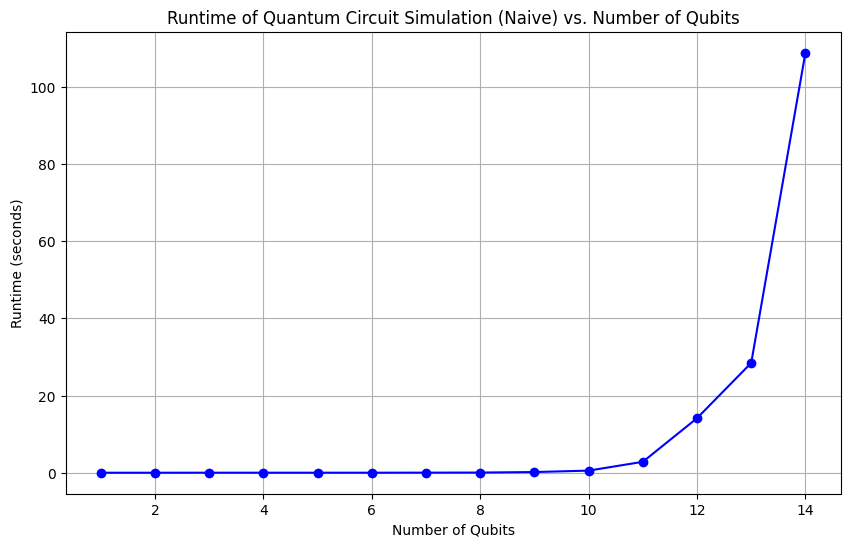

In [ ]:
plot_runtime(qubit_range, runtimes)

## 2. Advanced Simulation with tensor multiplication

In [ ]:
# Initialize the state tensor for n qubits (|00...0>)
def initial_state_tensor(num_qubits):
    state = np.zeros([2] * num_qubits)
    state[(0,) * num_qubits] = 1
    return state


In [ ]:
# Example for a 1-5-qubit system
for i in range (1, 5):
    n_qubits = i
    statevector = initial_state_tensor(n_qubits)
    print(f"n_qubit: {n_qubits}, State:|{'0' * n_qubits}>, Statevector:\n{statevector}")
    print(f"Statevector(flatened):\n{statevector.flatten()}")
    print()


n_qubit: 1, State:|0>, Statevector:
[1. 0.]
Statevector(flatened):
[1. 0.]

n_qubit: 2, State:|00>, Statevector:
[[1. 0.]
 [0. 0.]]
Statevector(flatened):
[1. 0. 0. 0.]

n_qubit: 3, State:|000>, Statevector:
[[[1. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
Statevector(flatened):
[1. 0. 0. 0. 0. 0. 0. 0.]

n_qubit: 4, State:|0000>, Statevector:
[[[[1. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]
Statevector(flatened):
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



In [ ]:
# Apply a single-qubit gate to a specific qubit
def apply_single_qubit_gate(state_tensor, gate, qubit_index):
    num_qubits = len(state_tensor.shape)
    axes = [qubit_index] + list(range(1, num_qubits))
    reshaped_tensor = np.moveaxis(state_tensor, qubit_index, 0)

    # Apply the single-qubit gate using tensor multiplication
    new_state = np.tensordot(gate, reshaped_tensor, axes=1)

    # Restore the qubit axis order
    return np.moveaxis(new_state, 0, qubit_index)

# Define a quantum circuit and apply gates sequentially using tensor multiplication
def quantum_circuit_tensor(num_qubits):
    state = initial_state_tensor(num_qubits)

    # print(f"Statevector(before)\n",state)
    # print()

    for i in range(num_qubits):
        # Apply X gate to all
        state = apply_single_qubit_gate(state, pauli_x(), qubit_index=i)

        # Apply Hadamard gate to all
        state = apply_single_qubit_gate(state, hadamard(), qubit_index=i)


    # print(f"Statevector(after)\n",state)
    # print()

    return state

def measure_runtime_tensor(n_qubits):
    qubit_range = range(1, n_qubits)  # Test for 1 to n_qubits
    runtimes = []

    for num_qubits in qubit_range:
        start_time = time.time()

        quantum_circuit_tensor(num_qubits)

        end_time = time.time()
        runtime = end_time - start_time
        runtimes.append(runtime)

        print(f"Number of qubits: {num_qubits}, Runtime: {runtime:.6f} seconds")

    return runtimes

# Run the runtime measurement for tensor simulation

n_qubits = 28
qubit_range = range(1, n_qubits+1)
runtimes_tensor = measure_runtime_tensor(n_qubits+1)

Number of qubits: 1, Runtime: 0.004863 seconds
Number of qubits: 2, Runtime: 0.000463 seconds
Number of qubits: 3, Runtime: 0.000540 seconds
Number of qubits: 4, Runtime: 0.000635 seconds
Number of qubits: 5, Runtime: 0.001466 seconds
Number of qubits: 6, Runtime: 0.001483 seconds
Number of qubits: 7, Runtime: 0.001199 seconds
Number of qubits: 8, Runtime: 0.001735 seconds
Number of qubits: 9, Runtime: 0.002342 seconds
Number of qubits: 10, Runtime: 0.001767 seconds
Number of qubits: 11, Runtime: 0.001855 seconds
Number of qubits: 12, Runtime: 0.001863 seconds
Number of qubits: 13, Runtime: 0.002622 seconds
Number of qubits: 14, Runtime: 0.002954 seconds
Number of qubits: 15, Runtime: 0.004393 seconds
Number of qubits: 16, Runtime: 0.009455 seconds
Number of qubits: 17, Runtime: 0.015497 seconds
Number of qubits: 18, Runtime: 0.037556 seconds
Number of qubits: 19, Runtime: 0.088383 seconds
Number of qubits: 20, Runtime: 0.324830 seconds
Number of qubits: 21, Runtime: 0.668547 seconds
N

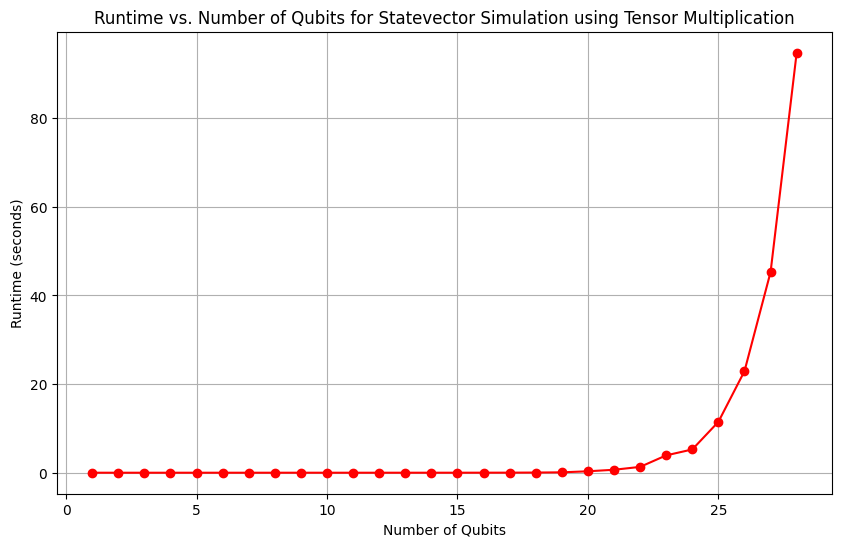

In [ ]:
# Plot the runtime vs. number of qubits
def plot_runtime(qubit_range, runtimes):
    plt.figure(figsize=(10, 6))
    plt.plot(qubit_range, runtimes, marker='o', color='r')
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime vs. Number of Qubits for Statevector Simulation using Tensor Multiplication')
    plt.grid(True)
    plt.show()
plot_runtime(qubit_range, runtimes_tensor)

Tensor multiplication is much more efficient than regular matrix dot multiplication. With dot multiplication, I could simulate 14 qubits, while with tensor multiplication, I could simulate 28 qubits, twice the amount achievable with dot multiplication. Regarding runtime, it increases with the increasing number of qubits. Again, the runtime for tensor multiplication is much faster than for dot multiplication.

> P.S.: I managed to work only on the X and H gates. I skipped the CNOT gate.

## 3. Bonus Question

In [ ]:
from collections import defaultdict

# sampling from the final states in the statevector

def sample_from_statevector(statevector, num_samples=1000):
    # probabilities from statevector
    probabilities = np.abs(statevector) ** 2

    # number of qubits
    num_qubits = int(np.log2(len(statevector)))

    # samples
    outcomes = np.arange(2 ** num_qubits)

    # sample from the probabilities
    samples = np.random.choice(outcomes, size=num_samples, p=probabilities)

    # convert outcomes to binary strings and count frequencies
    sample_counts = defaultdict(int)
    for sample in samples:
        binary_str = np.binary_repr(sample, width=num_qubits)
        sample_counts[binary_str] += 1

    return dict(sample_counts)

'''
I am sampling from the following statevectors. For tensors,
I would flatten the matrix to get the statevector.
'''
statevectors = [
                    [1/2**0.5, 1/2**0.5],                           # + sate
                    [1/2**0.5, (-1)**0.5/2**0.5],                   # i sate
                    [1/2**0.5, 0, 0, 1/2**0.5],                     # Bell psi plus
                    [1/2**0.5, 0, 0, 0, 0, 0, 0, 1/2**0.5],         # GHZ 3 qubits
                    [1/2**0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/2**0.5], # GHZ 4 qubits
                    [0.5, 0, 0, 0.5, 0, 0.5, 0, 0.5]                # random state with 3 qubits
                ]

print("The string in between '' is the outcome and the number denotes no. of outcomes.")
for statevector in statevectors:
    samples = sample_from_statevector(statevector, num_samples=100)
    print(samples)


The string in between '' is the outcome and the number denotes no. of outcomes.
{'1': 44, '0': 56}
{'1': 48, '0': 52}
{'00': 50, '11': 50}
{'000': 45, '111': 55}
{'1111': 51, '0000': 49}
{'011': 28, '101': 30, '111': 22, '000': 20}


Estimaing expectation values, $⟨Ψ|Op|Ψ⟩$

In [ ]:
def pauli_z():
    return np.array([[1, 0],
                     [0, -1]])

def pauli_y():
    return np.array([[0, -1],
                     [1, 0]])* (-1)**0.5

def compute_expectation_value(statevector, operator):

    # Apply the operator to the statevector (matrix-vector multiplication); | O | Psi>
    op_applied_to_psi = np.dot(operator, statevector)

    # Compute the inner product: <Psi | O | Psi>
    # vdot computes conjugate inner product
    expectation_value = np.vdot(statevector, op_applied_to_psi)

    return expectation_value

# Example: Statevector for a 1-qubit |+> state (superposition state)
statevector = np.array([1/2**0.5, 1/2**0.5])  # |+> = (|0> + |1>)/sqrt(2)

# Compute expectation value of Hadamard
expectation_value = compute_expectation_value(statevector, hadamard())
print("Expectation value of the Hadamard Operator:", expectation_value)


# Compute expectation value of Pauli-X
expectation_value = compute_expectation_value(statevector, pauli_x())
print("Expectation value of the Pauli-X Operator:", expectation_value)

# Compute expectation value of Pauli-Y
expectation_value = compute_expectation_value(statevector, pauli_y())
print("Expectation value of the Pauli-Y Operator:", expectation_value)

# Compute expectation value of Pauli-Z
expectation_value = compute_expectation_value(statevector, pauli_z())
print("Expectation value of the Pauli-Z Operator:", expectation_value)

# Compute expectation value of Identity
expectation_value = compute_expectation_value(statevector, identity())
print("Expectation value of the Identity Operator:", expectation_value)

Expectation value of the Hadamard Operator: 0.7071067811865474
Expectation value of the Pauli-X Operator: 0.9999999999999998
Expectation value of the Pauli-Y Operator: 0j
Expectation value of the Pauli-Z Operator: 0.0
Expectation value of the Identity Operator: 0.9999999999999998
